In [1]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv("Data-Melbourne_F_fixed.csv")  # Replace with your file path


Preprocessing the dataset

In [2]:
# Overview of missing data
missing_summary = data.isnull().sum()

# Count total missing values
total_missing = data.isnull().sum().sum()

# Display percentage of missing values per column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Combine into a summary
missing_report = pd.DataFrame({
    'Missing Values': missing_summary,
    'Percentage': missing_percentage
}).sort_values(by='Percentage', ascending=False)

print(missing_report)


                          Missing Values  Percentage
Unnamed: 0                             0         0.0
Average Outflow                        0         0.0
Month                                  0         0.0
Year                                   0         0.0
Maximum wind speed                     0         0.0
Average wind speed                     0         0.0
Average visibility                     0         0.0
Total rainfall                         0         0.0
Average humidity                       0         0.0
Atmospheric pressure                   0         0.0
Minimum temperature                    0         0.0
Maximum temperature                    0         0.0
Average Temperature                    0         0.0
Total Nitrogen                         0         0.0
Chemical Oxygen Demand                 0         0.0
Biological Oxygen Demand               0         0.0
Ammonia                                0         0.0
Energy Consumption                     0      

In [3]:
# Finding duplicate rows
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 0


In [4]:
# Checking for missing values
print(data.isnull().sum())

# Checking for placeholders like '-999', 'NA', or 'None'
placeholder_values = ['-999', '-999.0', 'NA', 'N/A', 'None', 'null', ' ']
for placeholder in placeholder_values:
    data.replace(placeholder, np.nan, inplace=True)

# Rechecking for missing values
print(data.isnull().sum())


Unnamed: 0                  0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64
Unnamed: 0                  0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity           

In [5]:
# Checking for negative or zero values in numerical columns
numerical_cols = ['Average Outflow', 'Average Inflow', 'Energy Consumption',
                  'Ammonia', 'Biological Oxygen Demand', 'Chemical Oxygen Demand',
                  'Total Nitrogen', 'Average Temperature']

for col in numerical_cols:
    print(f"{col}: Negative values = {(data[col] < 0).sum()}")


Average Outflow: Negative values = 0
Average Inflow: Negative values = 0
Energy Consumption: Negative values = 0
Ammonia: Negative values = 0
Biological Oxygen Demand: Negative values = 0
Chemical Oxygen Demand: Negative values = 0
Total Nitrogen: Negative values = 0
Average Temperature: Negative values = 0


In [6]:
print(data.dtypes)

# Converting categorical columns
data['Month'] = data['Month'].astype('category')
data['Day'] = data['Day'].astype('category')
data['Year'] = data['Year'].astype('category')


Unnamed: 0                    int64
Average Outflow             float64
Average Inflow              float64
Energy Consumption          float64
Ammonia                     float64
Biological Oxygen Demand    float64
Chemical Oxygen Demand      float64
Total Nitrogen              float64
Average Temperature         float64
Maximum temperature         float64
Minimum temperature         float64
Atmospheric pressure        float64
Average humidity            float64
Total rainfall              float64
Average visibility          float64
Average wind speed          float64
Maximum wind speed          float64
Year                        float64
Month                       float64
Day                         float64
dtype: object


Scaling Data


In [7]:
from sklearn.preprocessing import StandardScaler

# Scaling only numerical columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numerical_cols])

# Replacing original numerical columns with scaled versions
data[numerical_cols] = scaled_features


Feature Selection

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder

# Handling categorical data
if 'Season' in data.columns:
    label_encoder = LabelEncoder()
    data['Season'] = label_encoder.fit_transform(data['Season'])

# Selecting only numerical columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation-based feature selection
corr_matrix = numeric_data.corr()

# Identifying highly correlated features (threshold: 0.9)
high_corr_pairs = np.where(np.abs(corr_matrix) > 0.9)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

print("Highly correlated features:", high_corr_pairs)

# Droping one feature from each highly correlated pair
features_to_drop = set(pair[1] for pair in high_corr_pairs)
data = data.drop(columns=list(features_to_drop))

# Feature importance using Random Forest
target = 'Average Outflow'  # Replace with your target variable
if target in data.columns:
    X = data.drop(columns=[target])
    y = data[target]

    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)

    # Get feature importances
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("Feature Importances:")
    print(feature_importances)

    # Selecting top features
    top_features = feature_importances.head(10)['Feature'].tolist()
    selected_data = data[top_features + [target]]  # Include the target variable in the final dataset
else:
    print(f"Target variable '{target}' not found in dataset!")



Highly correlated features: [('Average Temperature', 'Maximum temperature')]
Feature Importances:
                     Feature  Importance
1             Average Inflow    0.423882
0                 Unnamed: 0    0.179388
16                     Month    0.066962
17                       Day    0.051442
2         Energy Consumption    0.034777
10          Average humidity    0.030608
6             Total Nitrogen    0.029374
7        Average Temperature    0.028754
3                    Ammonia    0.025206
13        Average wind speed    0.025047
8        Minimum temperature    0.022205
5     Chemical Oxygen Demand    0.022044
14        Maximum wind speed    0.021909
4   Biological Oxygen Demand    0.019155
12        Average visibility    0.009166
15                      Year    0.006707
9       Atmospheric pressure    0.002537
11            Total rainfall    0.000837


In [9]:
top_features = ['Average Inflow', 'Year', 'Month', 'Day',
                'Energy Consumption', 'Average humidity',
                'Total Nitrogen', 'Ammonia',
                'Average wind speed']
selected_data = data[top_features + ['Average Outflow']]  # Include target variable


In [10]:
selected_data.to_csv("selected_features_data.csv", index=False)
print("Selected features saved to 'selected_features_data.csv'.")


Selected features saved to 'selected_features_data.csv'.


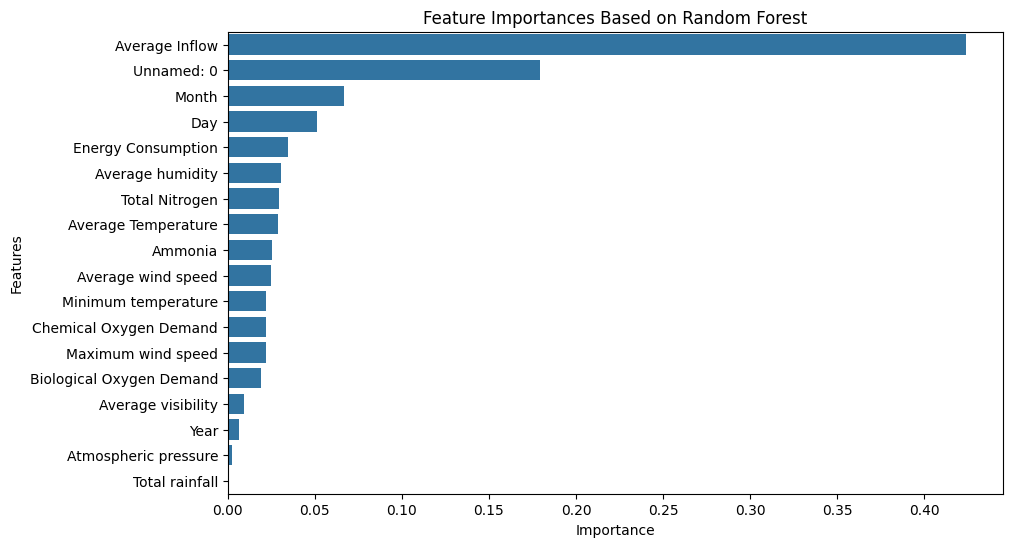

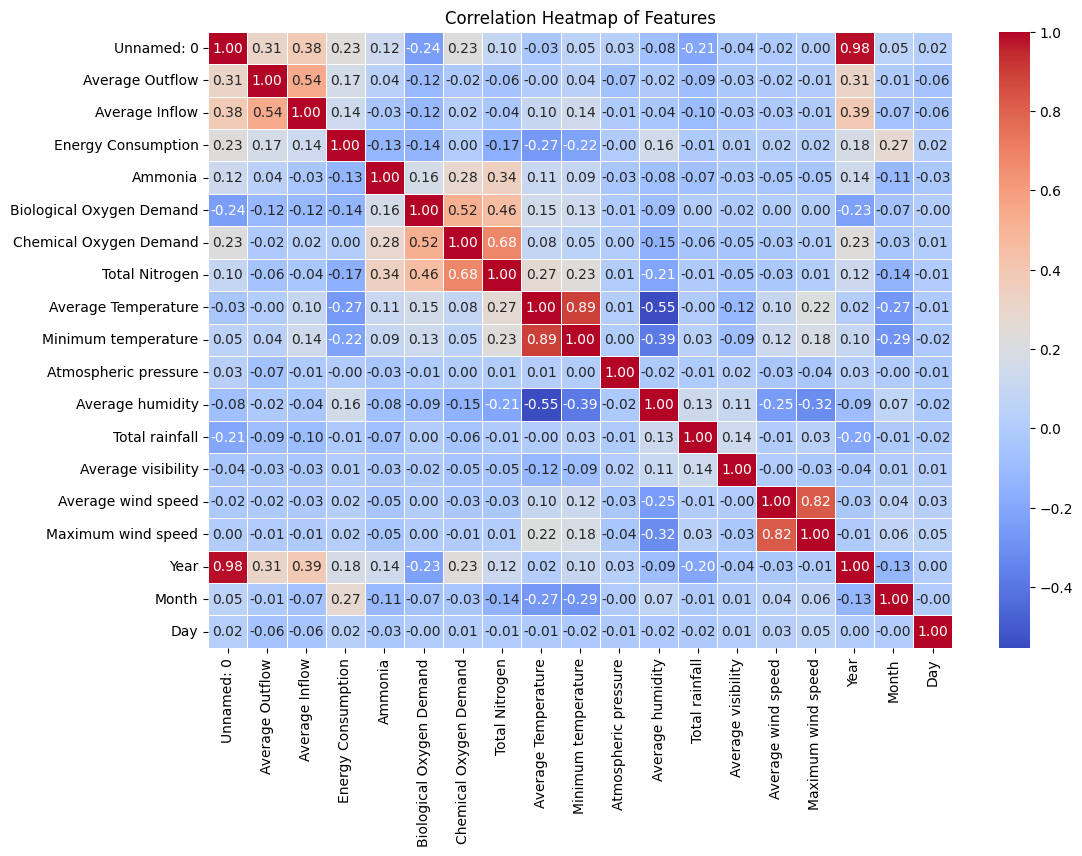

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ploting Feature Importances (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances Based on Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Computing the Correlation Matrix
corr_matrix = data.corr()

# Ploting Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


 Modeling with Machine Learning Algorithms:

In [12]:
!pip uninstall xgboost -y


Found existing installation: xgboost 1.7.5
Uninstalling xgboost-1.7.5:
  Successfully uninstalled xgboost-1.7.5


In [13]:
!pip install xgboost==1.7.5


  Using cached xgboost-1.7.5-py3-none-manylinux2014_x86_64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.5-py3-none-manylinux2014_x86_64.whl (200.3 MB)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

X = data.drop(columns=['Ammonia'])
y = data['Ammonia']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scaling features for models like KNN and SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test spliting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Ensuring classes are consistent in both training and testing sets
train_classes = np.unique(y_train)  # Classes in the training set
test_classes = np.unique(y_test)    # Classes in the testing set

# Finding common classes between train and test sets
common_classes = np.intersect1d(train_classes, test_classes)

# Filtering the training and test sets to only include these common classes
mask_train = np.isin(y_train, common_classes)
mask_test = np.isin(y_test, common_classes)

X_train_filtered = X_train[mask_train]
y_train_filtered = y_train[mask_train]

X_test_filtered = X_test[mask_test]
y_test_filtered = y_test[mask_test]

In [15]:
# Remaping the classes to a continuous set of class labels
# Mapping the classes to a continuous range (e.g., [0, 1, 2, ...])
class_mapping = {old_class: new_class for new_class, old_class in enumerate(common_classes)}
y_train_filtered = np.array([class_mapping[label] for label in y_train_filtered])
y_test_filtered = np.array([class_mapping[label] for label in y_test_filtered])


In [16]:
#Model Training and Prediction
# Logistic Regression from sklearn
log_reg = LogisticRegression()
log_reg.fit(X_train_filtered, y_train_filtered)
y_pred_log_reg = log_reg.predict(X_test_filtered)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_filtered, y_train_filtered)
y_pred_knn = knn.predict(X_test_filtered)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_filtered, y_train_filtered)
y_pred_dt = dt.predict(X_test_filtered)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_filtered, y_train_filtered)
y_pred_rf = rf.predict(X_test_filtered)

# Support Vector Machine
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_filtered, y_train_filtered)
y_pred_svm = svm.predict(X_test_filtered)

# XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_filtered, y_train_filtered)
y_pred_xgb = xgb.predict(X_test_filtered)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [17]:
# Model Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-----------------------------------------------------------")


In [18]:
# Evaluate all models
evaluate_model("Logistic Regression (sklearn)", y_test_filtered, y_pred_log_reg)
evaluate_model("KNN", y_test_filtered, y_pred_knn)
evaluate_model("Decision Tree", y_test_filtered, y_pred_dt)
evaluate_model("Random Forest", y_test_filtered, y_pred_rf)
evaluate_model("SVM", y_test_filtered, y_pred_svm)
evaluate_model("XGBoost", y_test_filtered, y_pred_xgb)

Logistic Regression (sklearn) Performance:
Accuracy: 0.08394160583941605
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00        10
          11       0.17      0.20      0.18         5
          12       0.05      0.08      0.06        12
          13       0.38      0.16      0.22        19
          14       0.19      0.23      0.21        13
          15       0.11      0.23     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [19]:
# Importing required libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import xgboost as xgb
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train-test spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier()
}

# Hyperparameters for tuning
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    'Decision Tree': {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    'XGBoost': {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.01], 'max_depth': [5, 10, 20]}
}




In [20]:

# Functioning for evaluating models
def evaluate_model(model, X_train, y_train, X_test, y_test, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, f1, cm, grid_search.best_params_

# Loop through models and evaluate
results = []
for model_name, model in models.items():
    print(f"Training {model_name} with hyperparameter tuning...")
    accuracy, f1, cm, best_params = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, param_grids[model_name])

    results.append({
        'Model': model_name,
        'Best Hyperparameters': best_params,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Confusion Matrix': cm
    })

# Creating a DataFrame for better visualization
results_df = pd.DataFrame(results)

Training Logistic Regression with hyperparameter tuning...
Training KNN with hyperparameter tuning...
Training Decision Tree with hyperparameter tuning...
Training Random Forest with hyperparameter tuning...
Training SVM with hyperparameter tuning...
Training XGBoost with hyperparameter tuning...


In [21]:
# Display results
print(results_df)


                 Model                               Best Hyperparameters  \
0  Logistic Regression                         {'C': 1, 'solver': 'saga'}   
1                  KNN  {'metric': 'manhattan', 'n_neighbors': 7, 'wei...   
2        Decision Tree          {'max_depth': 10, 'min_samples_split': 2}   
3        Random Forest  {'max_depth': 5, 'min_samples_split': 2, 'n_es...   
4                  SVM    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}   
5              XGBoost  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...   

   Accuracy  F1-Score                     Confusion Matrix  
0  1.000000  1.000000  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]  
1  1.000000  1.000000  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]  
2  1.000000  1.000000  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]  
3  1.000000  1.000000  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]  
4  0.966667  0.966411  [[10, 0, 0], [0, 8, 1], [0, 0, 11]]  
5  1.000000  1.000000  [[10, 0, 0], [0, 9, 0], [0, 0, 11]]  
